In [6]:
## Import and read the raw data
import pandas as pd

data = pd.read_csv('bank-additional-full.csv', delimiter=';')
data.head()

# Description of fields
# age               numeric
# job               categorical
# marital           categorical
# education         categorical
# default           categorical
# housing           categorical
# loan              categorical
# contact           categorical
# month             categorical
# day               categorical
# duration          numeric
# campaign          numeric
# pdays             numeric
# previous          numeric
# poutcome          categorical
# emp.var.rate      numeric
# cons.price.idx    numeric
# cons.conf.idx     numeric
# euribor3m         numeric
# nr.employed       numeric

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
import numpy as np
# Encode the desired target ("y") to a binary representation
from sklearn.preprocessing import OrdinalEncoder

def encode_to_ordinal(array):
    ordinal_encoder = OrdinalEncoder(dtype=np.int)
    return ordinal_encoder.fit_transform(array.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
y_encoded = encode_to_ordinal(data.y.values)


In [16]:
from numpy import nan
# Replace 999 values in pdays colunn with NaN
data.loc[data['pdays'] == 999, 'pdays'] = nan

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [11]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for categorical features
one_hot_encoder = OneHotEncoder(dtype=np.int, sparse=True)

# start assembling cleaned data
clean_data = pd.DataFrame(one_hot_encoder.fit_transform(data[['job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]).toarray())
# one_hot_encoder.categories_
clean_data['age'] = data['age']
clean_data['campaign'] = data['campaign']
clean_data['pdays'] = data['pdays']
clean_data['previous'] = data['previous']
clean_data['emp.var.rate'] = data['emp.var.rate']
clean_data['cons.price.idx'] = data['cons.price.idx']
clean_data['cons.conf.idx'] = data['cons.conf.idx']
clean_data['euribor3m'] = data['euribor3m']
clean_data['nr.employed'] = data['nr.employed']
clean_data['y'] = y_encoded
clean_data.head()

,0,1,2,3,4,5,6,7,8,9,...,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,0,0,0,0,0,0,...,56,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,0
1,0,0,0,0,0,0,0,1,0,0,...,57,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,0
2,0,0,0,0,0,0,0,1,0,0,...,37,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,0,0,0,0,0,0,0,0,...,40,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,0
4,0,0,0,0,0,0,0,1,0,0,...,56,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>,
        <AxesSubplot:title={'center':'cons.price.idx'}>],
       [<AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr.employed'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

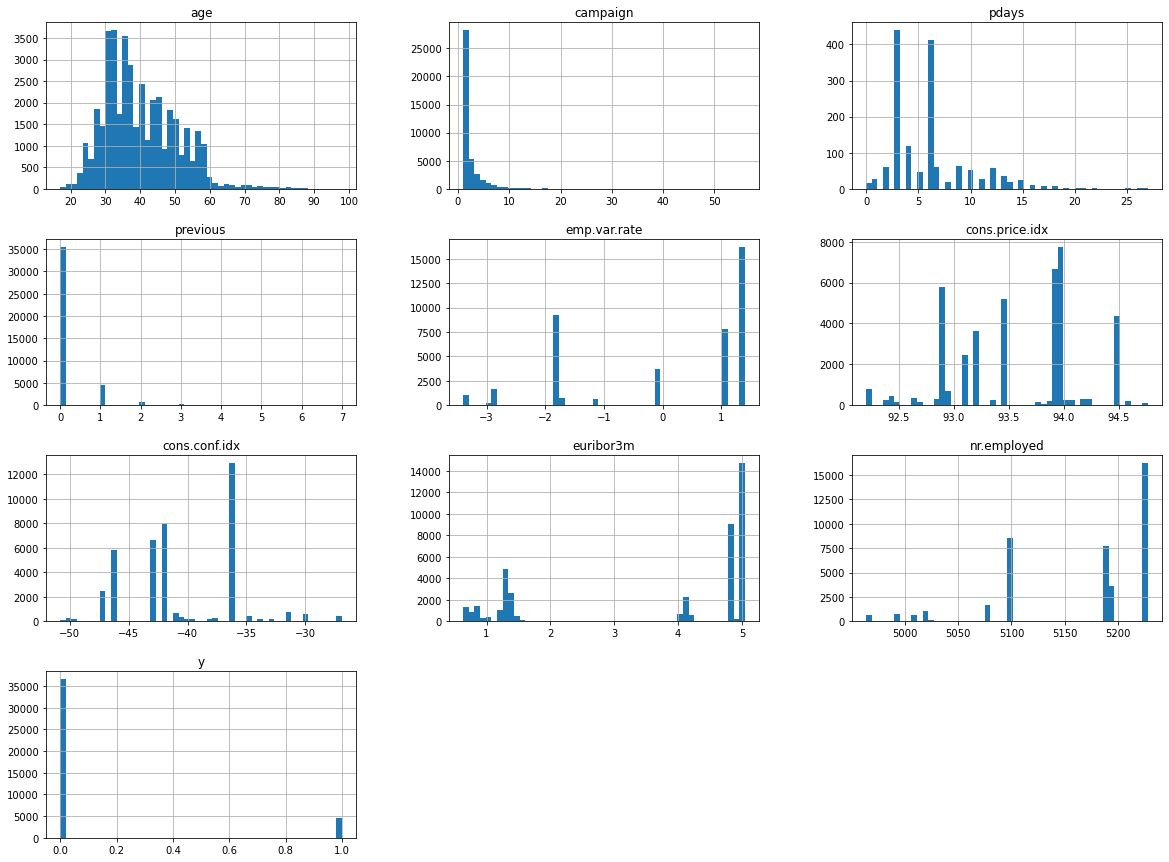

In [12]:
## Generate histograms for numerical features in processed data
import matplotlib.pyplot as plt

%matplotlib inline

histogram_columns = clean_data[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]
histogram_columns.hist(bins=50, figsize=(20,15))

In [13]:
## Search for correlations
correlation_matrix = clean_data.corr()
correlation_matrix['y'].sort_values(ascending = False)

y               1.000000
52              0.316269
previous        0.230181
33              0.144773
40              0.144014
                  ...   
34             -0.144773
51             -0.193507
emp.var.rate   -0.298334
euribor3m      -0.307771
nr.employed    -0.354678
Name: y, Length: 63, dtype: float64